# P1W2D4PM - Model Deployment - Part 2

---
## A. Make Your Own Model

Campus recruitment is a strategy for sourcing, engaging and hiring young talent for internship and entry-level positions. College recruiting is typically a tactic for medium- to large-sized companies with high-volume recruiting needs, but can range from small efforts (like working with university career centers to source potential candidates) to large-scale operations (like visiting a wide array of colleges and attending recruiting events throughout the spring and fall semester). Campus recruitment often involves working with university career services centers and attending career fairs to meet in-person with college students and recent graduates.

Context of our Dataset: Our dataset revolves around the placement season of a Business School in India. Where it has various factors on candidates getting hired such as work experience,exam percentage etc., Finally it contains the status of recruitment and remuneration details.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

In [2]:
#Loading the single csv file to a variable named 'placement'
placement=pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w2/P1W2D4PM%20-%20Model%20Deployment%20-%20Part%202%20-%20Campus.csv')
placement_copy=placement.copy()
placement_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Inference

- We have Gender and Educational qualification data
- We have all the educational performance(score) data
- We have the status of placement and salary details
- We can expect null values in salary as candidates who weren't placed would - have no salary
- Status of placement is our target variable rest of them are independent variable except salary

In [3]:
print("The shape of the  data is (row, column):"+ str(placement.shape))
print(placement_copy.info())

The shape of the  data is (row, column):(215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


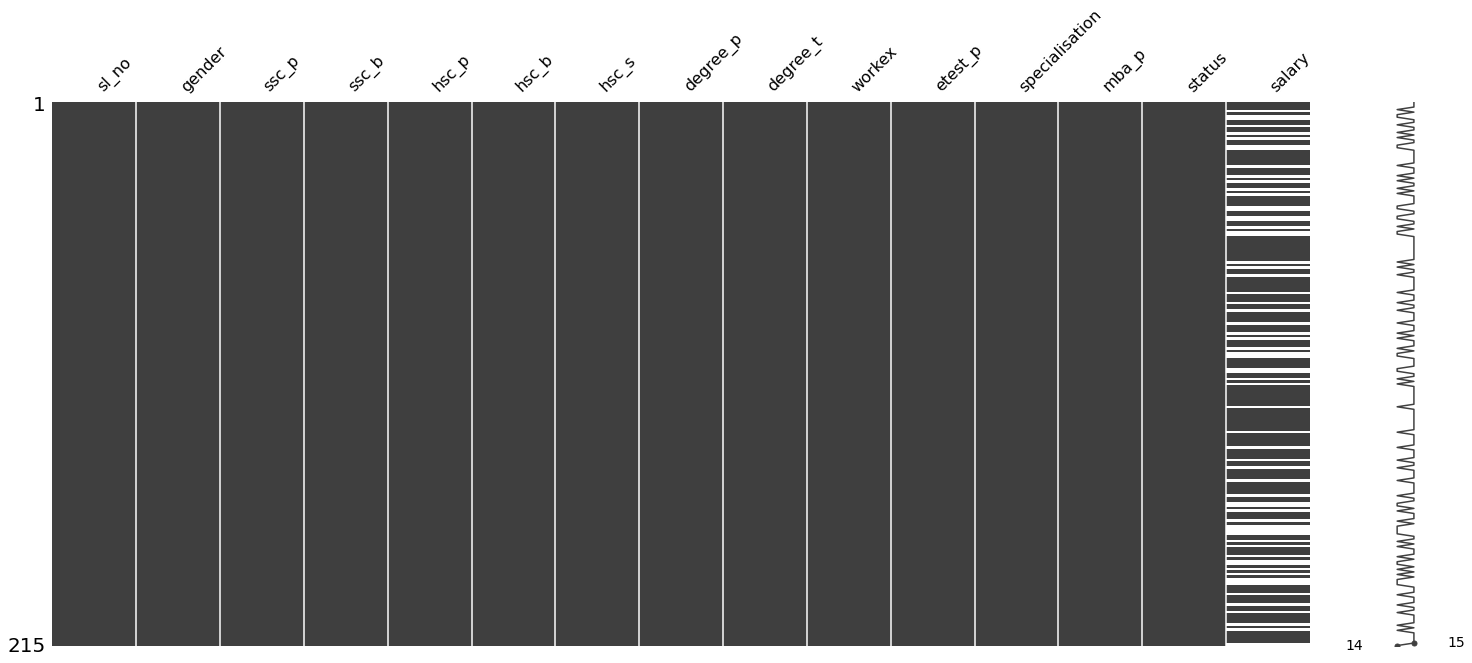

In [4]:
import missingno as msno 
msno.matrix(placement)

In [5]:
print('Data columns with null values:',placement_copy.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [6]:
placement_copy['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:', placement_copy['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


In [7]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Preprocessing data for classficiation models**

In [8]:
X=placement_copy.drop(['status', 'salary'],axis=1)
y=placement_copy.status

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (172, 10)
Input Test: (43, 10)
Output Training: (172,)
Output Test: (43,)


In [10]:
X_train

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
47,M,63.00,60.00,Commerce,57.00,Comm&Mgmt,Yes,78.00,Mkt&Fin,54.55
202,M,70.00,63.00,Science,66.00,Sci&Tech,No,61.28,Mkt&HR,60.11
27,M,63.00,67.00,Commerce,66.00,Comm&Mgmt,No,68.00,Mkt&HR,57.69
58,M,74.00,62.00,Science,68.00,Comm&Mgmt,No,74.00,Mkt&Fin,57.99
40,F,78.00,77.00,Commerce,80.00,Comm&Mgmt,No,60.00,Mkt&Fin,66.72
...,...,...,...,...,...,...,...,...,...,...
203,M,55.68,61.33,Commerce,56.87,Comm&Mgmt,No,66.00,Mkt&HR,58.30
137,M,67.00,63.00,Commerce,72.00,Comm&Mgmt,No,56.00,Mkt&HR,60.41
72,M,84.86,67.00,Science,78.00,Comm&Mgmt,No,95.50,Mkt&Fin,68.53
140,M,65.00,64.80,Commerce,69.50,Comm&Mgmt,Yes,56.00,Mkt&Fin,56.94


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

In [13]:
placement_cat = X_train[['gender', 'workex', 'specialisation', 'hsc_s', 'degree_t']]

cat_encoder = OneHotEncoder()
placement_cat_1_hot = cat_encoder.fit_transform(placement_cat)
placement_cat_1_hot

<172x12 sparse matrix of type '<class 'numpy.float64'>'
	with 860 stored elements in Compressed Sparse Row format>

In [14]:
placement_num = X_train[['ssc_p',	'hsc_p', 'degree_p', 'etest_p', 'mba_p']]

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

placement_num_tr = num_pipeline.fit_transform(placement_num)

In [16]:
from sklearn.compose import ColumnTransformer

num_attribs = ['ssc_p',	'hsc_p', 'degree_p', 'etest_p', 'mba_p']
cat_attribs = ['gender', 'workex', 'specialisation', 'hsc_s', 'degree_t']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

placement_prepared = full_pipeline.fit_transform(X_train)

In [17]:
placement_prepared

array([[-0.37802451, -0.57006221, -1.30846321, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.2509715 , -0.29435751, -0.05053648, ...,  0.        ,
         0.        ,  1.        ],
       [-0.37802451,  0.07324875, -0.05053648, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.58624017,  0.07324875,  1.62669918, ...,  1.        ,
         0.        ,  0.        ],
       [-0.19831137, -0.12893469,  0.43865726, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.05968066,  0.90036285, -0.10644433, ...,  0.        ,
         0.        ,  1.        ]])

In [18]:
placement_test_prepared = full_pipeline.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(placement_prepared, y_train)

y_pred = logreg.predict(placement_test_prepared)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(placement_test_prepared, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(placement_prepared,y_train)

y_pred = dt.predict(placement_test_prepared)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7441860465116279


In [21]:
from sklearn.ensemble import RandomForestClassifier

rt=RandomForestClassifier(n_estimators=100)
rt.fit(placement_prepared,y_train)

y_pred=rt.predict(placement_test_prepared)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8604651162790697


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [0.1, 1.0, 10.0]}
  ]

logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5,
                           scoring='precision',
                           return_train_score=True)

grid_search.fit(placement_prepared, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 1.0, 10.0],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='precision')

In [23]:
final_model = grid_search.best_estimator_

In [24]:
some_data = placement.iloc[:5]

In [25]:
some_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [26]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", final_model)
    ])

full_pipeline_with_predictor.fit(X_train, y_train)
full_pipeline_with_predictor.predict(some_data)

array([1, 1, 1, 0, 1])

**Save your Model**

In [27]:
import joblib
joblib.dump(full_pipeline_with_predictor, "my_model.pkl")

['my_model.pkl']

---
## B. Deployment with Streamlit

```PY
import streamlit as st
import pandas as pd
import joblib

st.header('FTDS Model Deployment')
st.write("""
Created by FTDS Curriculum Team

Use the sidebar to select input features.
""")

@st.cache
def fetch_data():
    df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/campus.csv')
    return df

df = fetch_data()
st.write(df)

st.sidebar.header('User Input Features')

def user_input():
    gender = st.sidebar.selectbox('Gender', df['gender'].unique())
    ssc = st.sidebar.number_input('Secondary School Points', value=67.00)
    hsc = st.sidebar.number_input('High School Points', 0.0, value=91.0)
    hsc_s = st.sidebar.selectbox('High School Spec', df['hsc_s'].unique())
    degree_p = st.sidebar.number_input('Degree Points', 0.0, value=58.0)
    degree_t = st.sidebar.selectbox('Degree Spec', df['degree_t'].unique())
    workex = st.sidebar.selectbox('Work Experience?', df['workex'].unique())
    etest_p = st.sidebar.number_input('Etest Points', 0.0, value=78.00)
    spec = st.sidebar.selectbox('Specialization', df['specialisation'].unique())
    mba_p = st.sidebar.number_input('MBA Points', 0.0, value=54.55)

    data = {
        'gender': gender,
        'ssc_p': ssc,
        'hsc_p': hsc,
        'hsc_s': hsc_s,
        'degree_p': degree_p,
        'degree_t': degree_t,
        'workex': workex,
        'etest_p': etest_p,
        'specialisation':spec,
        'mba_p': mba_p
    }
    features = pd.DataFrame(data, index=[0])
    return features


input = user_input()

st.subheader('User Input')
st.write(input)

load_model = joblib.load("my_model.pkl")

prediction = load_model.predict(input)

if prediction == 1:
    prediction = 'Placed'
else:
    prediction = 'Not Placed'

st.write('Based on user input, the placement model predicted: ')
st.write(prediction)

```

---
## C. Deploy Your Streamlit app to Huggingface

HuggingFace is a community and data science platform that provides:
* Tools that enable users to build, train and deploy ML models based on open source (OS) code and technologies.

* A place where a broad community of data scientists, researchers, and ML engineers can come together and share ideas, get support and contribute to open source projects.

### C.1. Getting Started -> Your Repository

When you sign up to be a member of Hugging Face you get a Git-based hosted repository where you can store: Models, Datasets and Spaces.

It’s free to sign up as a Community individual contributor. There is a ‘Pro’ plan and separate pricing models for Organisations.


You have to went ahead and signed up, during the process you can also link to a Homepage, Github and Twitter accounts, as shown below:

<img src="https://miro.medium.com/max/1400/0*_ri6ZWReAW0EzQuH"></img>

Once you’ve created an account, you will be redirected to your personal repository. From this page you can do a number of things, including:
* See your Activity feed
* Viewing your profile and settings
* Creating a new Model, Dataset or Space
* See what’s currently trending across the Hugging Face community
* View your the list of Organizations to which you belong and jump into their respective areas
* Tap into helpful resources and documentation


<img src="https://miro.medium.com/max/1400/0*pFzzfWYa8_6UsEDg"></img>





### C.2. Models

When you create a new ‘Model’ it’s actually a Git repo for the files that relate to an ML model you want to share. It has all the benefits you would expect such as versioning, branches, discoverability and so on.

Clicking the ‘+ New’ button from the Hub and then selecting ‘Model’ takes you to a dialog where you can specify a name and the type of OS licence against which you are contributing your model’s code and associated assets.

You can also control the visibility of your model i.e. make it Public and make it visible to Hugging Face community or keep it Private within your personal repository or Organization.

<img src="https://miro.medium.com/max/1400/0*e9-YQGWiSOmET0mr"></img>


Once the model has been created, you will be taken to a repository view, with the ‘Model card’ tab selected by default:

<img src="https://miro.medium.com/max/1400/0*oZej9EimIB4z1c2E"></img>


For regular Git users, the ‘Files and versions’ tab will feel familiar:

<img src="https://miro.medium.com/max/1400/0*pOV0vwEB-qMpcR3q"></img>


Your model repository is empty at the moment, but the screenshot below shows what a fully populated model card would like for one of the Hugging Face community models:

<img src="https://miro.medium.com/max/1400/0*dM-H6pPm5rqQQBSC"></img>

### C.3. Dataset

Creating a new Dataset follows a very similar flow to creating a new model. click the ‘+ New’ button from the Hub and then select ‘Dataset’. You specify the name, licence type, public or private access. Then you see a repository view, with a ‘Dataset card’, ‘Files and versions’, analogous to what you have in the Model repository.

<img src="https://miro.medium.com/max/1400/0*wGs8xW1-4QI3TScC"></img>

### C.4. Spaces

Spaces give you a place to showcase your work in the form of self contained ML demo apps. There are lots of community contributed Spaces available for you to check out if you’re looking for inspiration.


<img src="https://miro.medium.com/max/1400/0*HQBY1H7nuQoUZyAA"></img>


It’s a nice way to build a portfolio of your projects that could be used when presenting, working collaboratively with colleagues in your organization or with the broader ML ecosystem.

To get started click the ‘+ New’ button from the Hub and then select ‘Space’. This takes you to a dialog where you can specify the name of the Space and the licence type.

You will also need to choose an SDK. At the time of writing you can pick from two Python based frameworks for hosting apps: Gradio or Streamlit. Alternatively you can just use custom HTML.

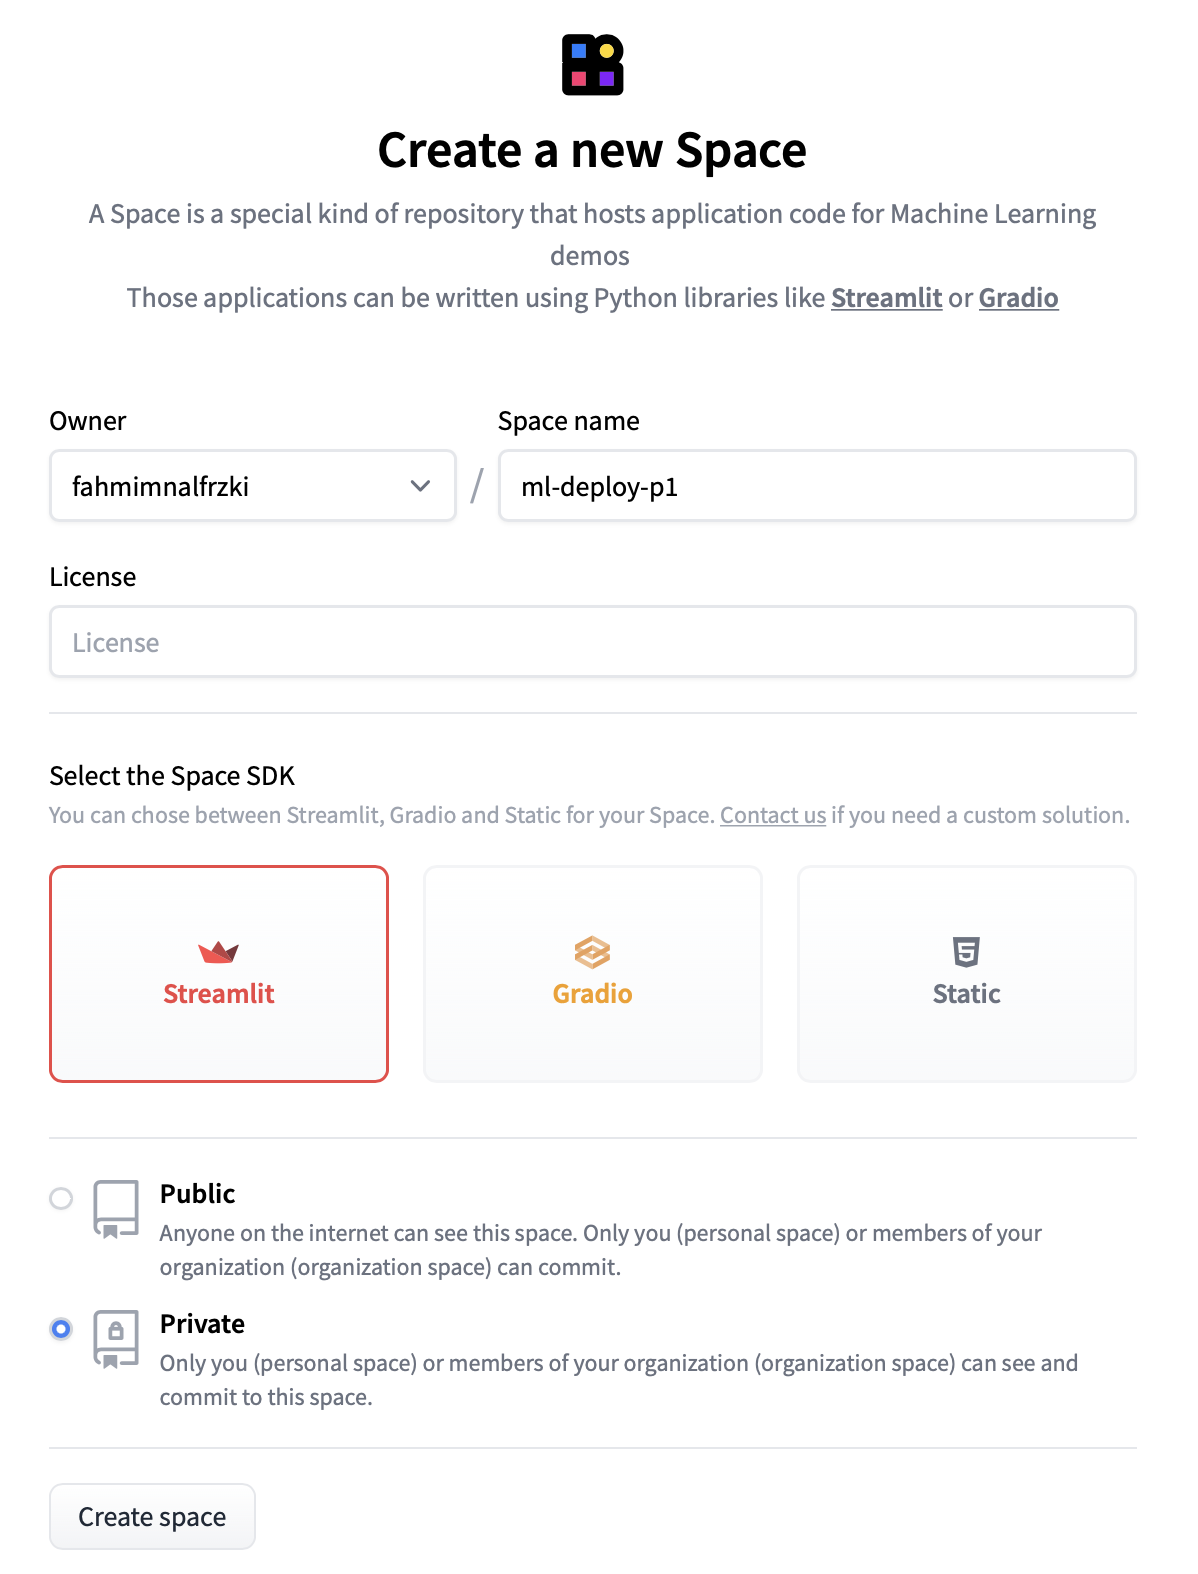

However, in this class, we will choose **Streamlit**.

### C.5. Get Started with Your Spaces!

To get start, you can clone the repository as well as you have done with the Github classroom repo.

```bash
$git clone https://huggingface.co/spaces/fahmimnalfrzki/ml-deploy-p1

$git add app.py 
$git commit -m "Add application file"
$git push
```

**Note that don't include the `$` on terminal/prompt**


Huggingface spaces now can run your app.py, but if there are some libraries or depedencies that you need to include with your app, please add requirement.txt file at the root of the repository to specify Python dependencies. Note that Huggingface Spaces only include Streamlit and basic Python library.

Example your requirement.txt:

```
sklearn
pandas
matplotlib
joblib
```



